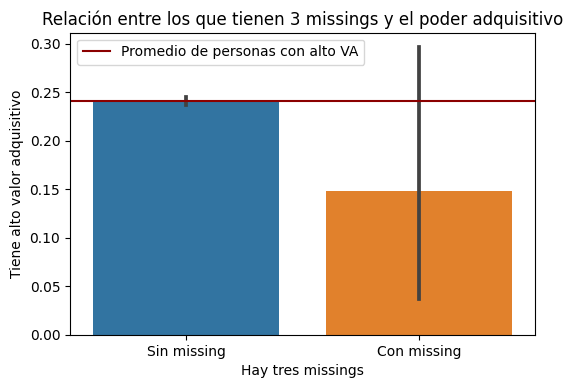

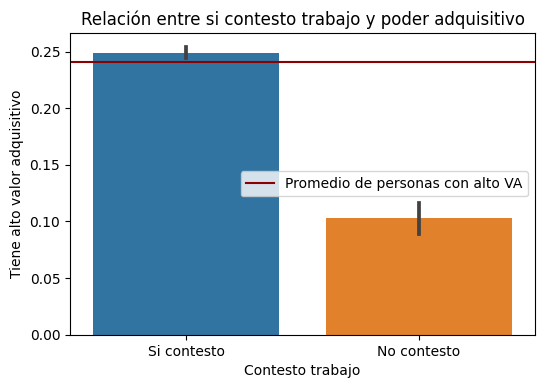

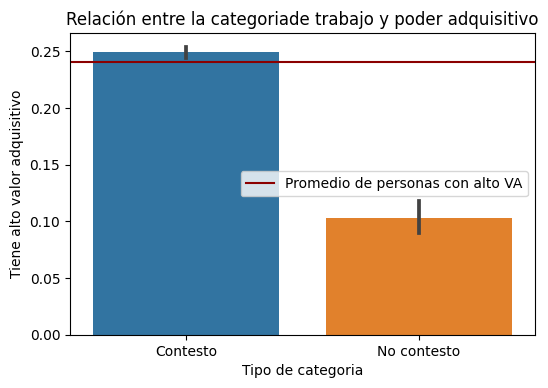

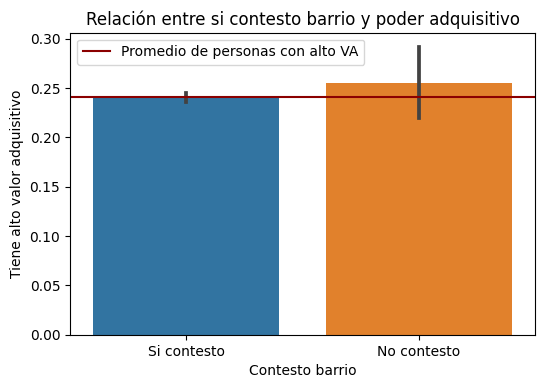

In [1]:
%run "../Secciones/feature_engineering.ipynb"

### genero

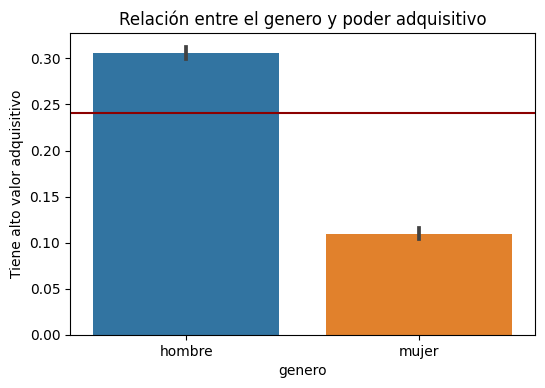

In [2]:
#BARPLOT
plt.figure(dpi=100)

ax = sns.barplot(
    data=df,
    y='tiene_alto_valor_adquisitivo',
    x='genero')

plt.xlabel("genero")
plt.ylabel("Tiene alto valor adquisitivo")
plt.title('Relación entre el genero y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.show()

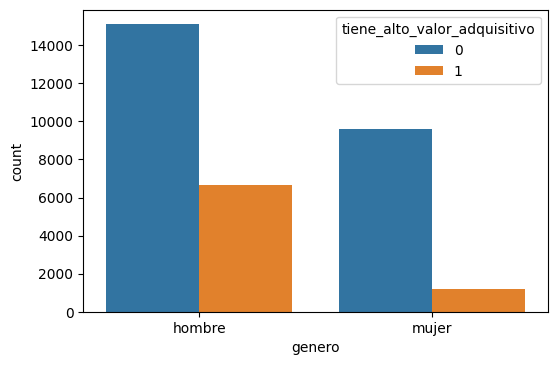

In [3]:
plt.figure(dpi = 100)

ax = sns.countplot(x="genero", hue="tiene_alto_valor_adquisitivo", data=df)
plt.show()

In [4]:
df_tmp = df.copy()

'''cooccurrence = pd.pivot_table(
    df_tmp,
    ,
    columns=['anios_estudiados'],
    index=['genero'],
    'mean'
).sort_index()
plt.figure(dpi=150)
plt.ylabel("Cómo creés que está tu sueldo con respecto al último semestre", fontsize=9)
sns.heatmap(cooccurrence, square=True, cmap="Wistia")
plt.show()'''
df_tmp.columns

Index(['anios_estudiados', 'barrio', 'categoria_de_trabajo', 'edad',
       'estado_marital', 'ganancia_perdida_declarada_bolsa_argentina',
       'genero', 'horas_trabajo_registradas', 'religion',
       'rol_familiar_registrado', 'tiene_alto_valor_adquisitivo', 'trabajo',
       'comuna'],
      dtype='object')

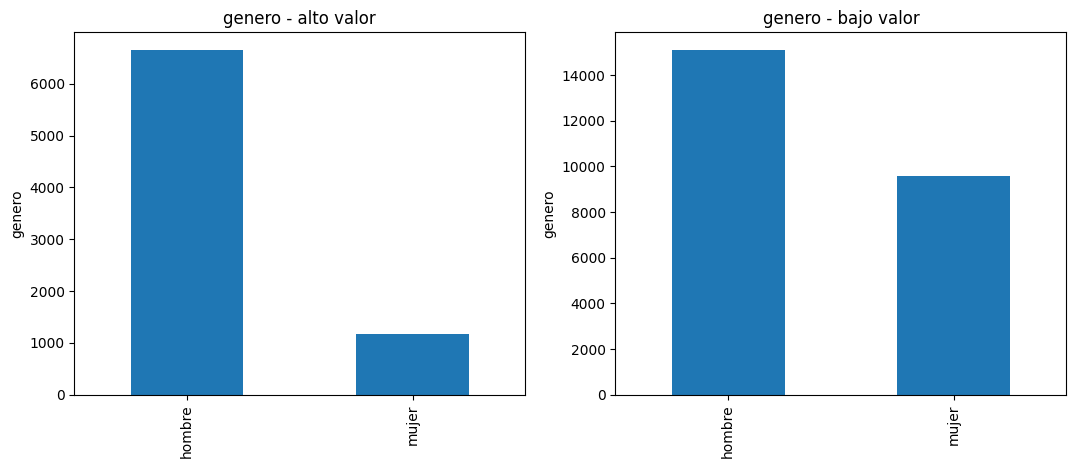

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_alto_valor = df[df['tiene_alto_valor_adquisitivo'] == 1]
df_bajo_valor = df[df['tiene_alto_valor_adquisitivo'] != 1]

df_alto_valor.genero.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("genero - alto valor")
axes[0].set_ylabel("genero")

df_bajo_valor.genero.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title("genero - bajo valor")
axes[1].set_ylabel("genero")

plt.show()

In [6]:
total_alto_valor = df_alto_valor['genero'].value_counts().sum()
total_buenos_trabajos = df_alto_valor[df_alto_valor['genero'] != 'mujer'].value_counts().sum()
total_buenos_trabajos/total_alto_valor*100

84.98149802220237

In [7]:
total_alto_valor = df['genero'].value_counts().sum()
total_buenos_trabajos = df[df['genero'] != 'mujer'].value_counts().sum()
total_buenos_trabajos/total_alto_valor*100

66.93823592707598

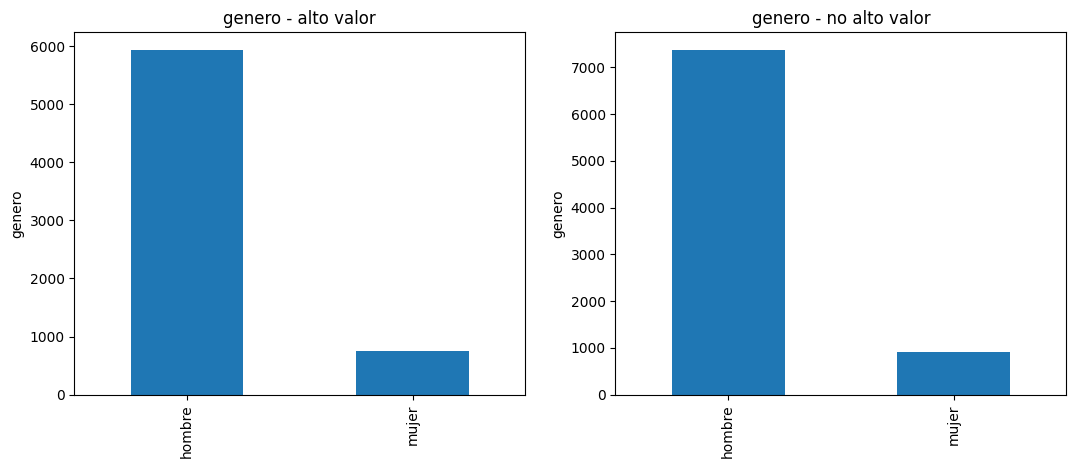

In [8]:
df_matrimonio = df[df['estado_marital'] == 'matrimonio']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_mat_alto_valor = df_matrimonio[df_matrimonio['tiene_alto_valor_adquisitivo'] == 1]
df_mat_bajo_valor = df_matrimonio[df_matrimonio['tiene_alto_valor_adquisitivo'] != 1]

df_mat_alto_valor.genero.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("genero - alto valor")
axes[0].set_ylabel("genero")

df_mat_bajo_valor.genero.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title("genero - no alto valor")
axes[1].set_ylabel("genero")

plt.show()

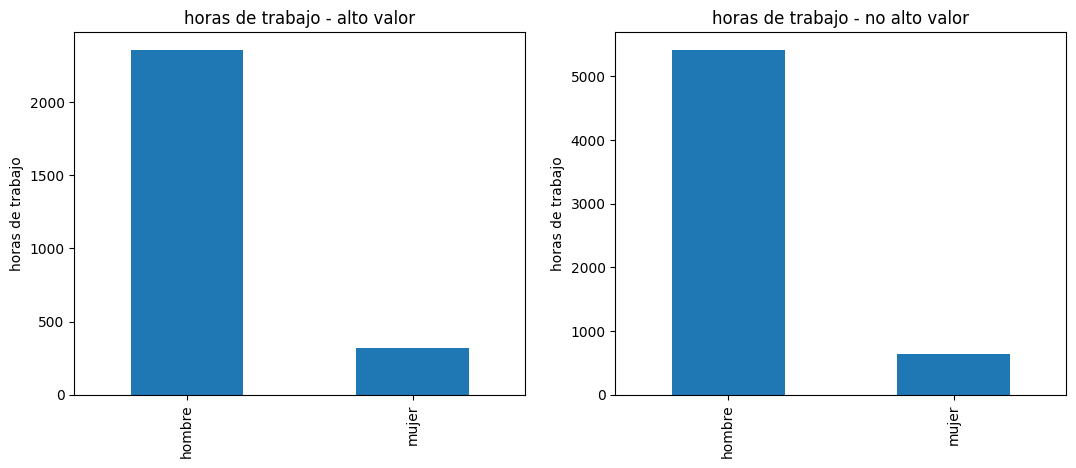

In [9]:
condicion = (df['trabajo'] != 'directivo_gerente') & (df['trabajo'] != 'profesional_especializado') & (df['trabajo'] != 'ventas')
df_sm_nt = df[(df['estado_marital'] == 'matrimonio') & (condicion)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_sm_nt_alto_valor = df_sm_nt[df_sm_nt['tiene_alto_valor_adquisitivo'] == 1]
df_sm_nt_bajo_valor = df_sm_nt[df_sm_nt['tiene_alto_valor_adquisitivo'] != 1]

df_sm_nt_alto_valor.genero.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("horas de trabajo - alto valor")
axes[0].set_ylabel("horas de trabajo")

df_sm_nt_bajo_valor.genero.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title("horas de trabajo - no alto valor")
axes[1].set_ylabel("horas de trabajo")

plt.show()

In [10]:
df_sm_nt_alto_valor[df_sm_nt_alto_valor['anios_estudiados'] >= 14.5].value_counts().sum()/df_alto_valor.value_counts().sum() * 100

10.43766747479903

In [11]:
df_sm_nt_bajo_valor[df_sm_nt_bajo_valor['anios_estudiados'] >= 14.5].value_counts().sum()/df_bajo_valor.value_counts().sum() * 100

3.580396921830701

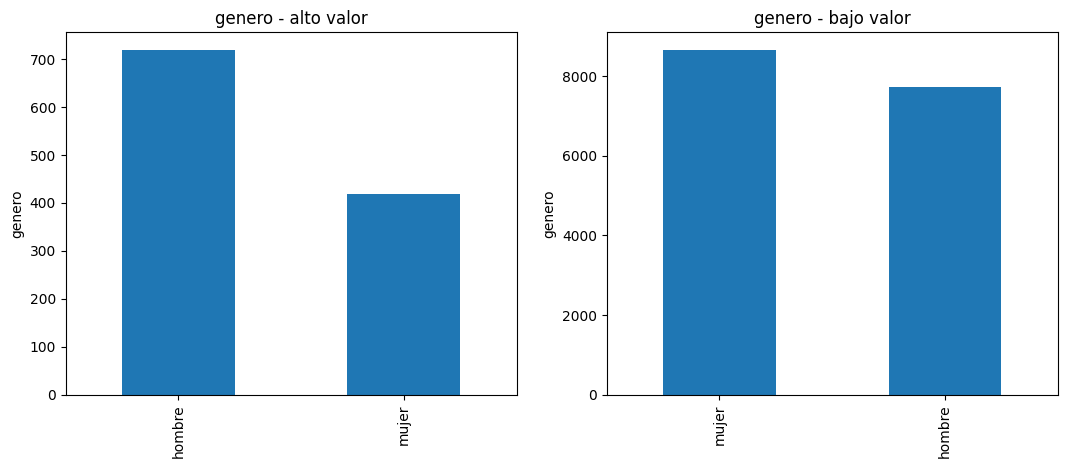

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)
df_genero = df[df['estado_marital'] != 'matrimonio']
df_genero_alto_valor = df_genero[df_genero['tiene_alto_valor_adquisitivo'] == 1]
df_genero_bajo_valor = df_genero[df_genero['tiene_alto_valor_adquisitivo'] != 1]

df_genero_alto_valor.genero.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("genero - alto valor")
axes[0].set_ylabel("genero")

df_genero_bajo_valor.genero.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title("genero - bajo valor")
axes[1].set_ylabel("genero")

plt.show()

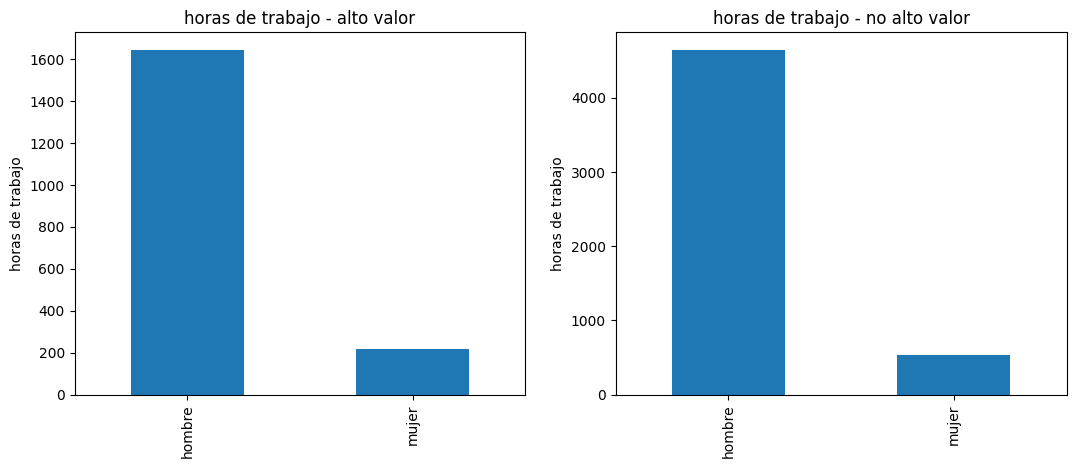

In [13]:
condicion_trabajo = (df['trabajo'] != 'directivo_gerente') & (df['trabajo'] != 'profesional_especializado') & (df['trabajo'] != 'ventas')
df_sm_nt_ne = df[(df['estado_marital'] == 'matrimonio') & (condicion_trabajo) & (df['anios_estudiados'] < 14.5)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_sm_nt_ne_alto_valor = df_sm_nt_ne[df_sm_nt_ne['tiene_alto_valor_adquisitivo'] == 1]
df_sm_nt_ne_bajo_valor = df_sm_nt_ne[df_sm_nt_ne['tiene_alto_valor_adquisitivo'] != 1]

df_sm_nt_ne_alto_valor.genero.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("horas de trabajo - alto valor")
axes[0].set_ylabel("horas de trabajo")

df_sm_nt_ne_bajo_valor.genero.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title("horas de trabajo - no alto valor")
axes[1].set_ylabel("horas de trabajo")

plt.show()